Priceline markets all data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
DATA_DIR = "/Users/Kendra.frederick/Code/shopping-grid/output/aws_eda/priceline-eda/20221101/all-day/"

In [8]:
os.listdir(DATA_DIR)

['.DS_Store', 'figs', 'priceline-only-data', 'priceline-markets-all-data']

# Distros

In [3]:
def plot_bar_cum_pct(data_df, top_n, bar_data_col, line_data_col, order_col, x_label, what,
    plot_title, file_name):
    """Example:
    bar_data_col = 'num_searches'
    line_data_col = 'cum_pct_searches'
    order_col = 'days_til_dept'
    x_label = 'advanced purchase (days)'
    top_n = 1000
    what = 'Searches'
    plot_title = 'Distribution of Searches by Advanced Purchase'
    file_name = 'dtd-overlay'
    """
    
    data_df = data_df.sort_values(by=order_col)[:top_n]
    data_bar = data_df[bar_data_col]
    data_line = data_df[line_data_col]
    xs = range(len(data_bar))

    fig, ax = plt.subplots(figsize=(10,5))
    w = 1 if top_n > 150 else 0.8
    ax.bar(xs, data_bar, width=w);
    ax.set_ylabel(f"Num {what}")
    ax.set_xlabel(x_label)

    ax2 = ax.twinx()
    ax2.plot(xs, data_line, marker=".", color="red")
    ax2.set_ylim(0, 1)
    ax2.set_ylabel(f"Cumulative % Total {what}")

    fig.suptitle(plot_title)
    plt.savefig(f"{file_name}.png")

In [4]:
pl_path = os.path.join(DATA_DIR, 'priceline-markets-all-data')

In [9]:
os.listdir(pl_path)

['dtd-stats', 'market-stats']

### markets

In [10]:
m_path = os.path.join(pl_path, 'market-stats')
data_list = []
for file in os.listdir(m_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(m_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

if len(data_list) > 1:
    df_m = pd.concat(data_list, axis=0)
else:
    df_m = data_list[0].copy()

In [11]:
df_m.head()

,market,num_searches,num_solutions,search_rank,solution_rank,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,SFO-LAX,228181,46569522,1,1,0.004845,0.006429,0.004845,0.006429
1,LAX-HNL,97356,46229259,19,2,0.002067,0.006382,0.050206,0.012810
2,LAX-MNL,170474,45922649,3,3,0.003619,0.006339,0.012369,0.019150
3,LAX-SEA,88764,35371978,21,4,0.001885,0.004883,0.054039,0.024033
4,MIA-MAD,105064,34217111,14,5,0.002231,0.004723,0.039489,0.028756


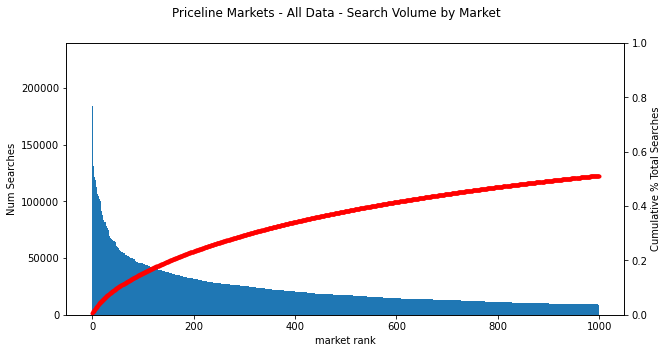

In [14]:
plot_bar_cum_pct(df_m, 1000, 'num_searches', 'cum_pct_searches', 'search_rank', 'market rank', 'Searches', 
                 'Priceline Markets - All Data - Search Volume by Market', 'plmad-mrkt-srch')

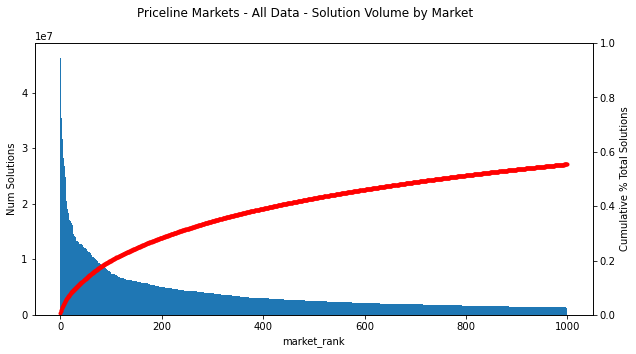

In [15]:
plot_bar_cum_pct(df_m, 1000, 'num_solutions', 'cum_pct_solutions', 'solution_rank', 'market_rank', 'Solutions', 
                 'Priceline Markets - All Data - Solution Volume by Market', 'plmad-mrkt-sltn')

In [16]:
def print_market_stats(df, num_pct, what):
    what_dict = {'search':
                 {'rank_col': 'search_rank',
                  'cum_pct_col': 'cum_pct_searches'},
                 'solution':
                 {'rank_col': 'solution_rank',
                  'cum_pct_col': 'cum_pct_solutions'},
                }
    abs_num = int(len(df) * num_pct)
    print(f"For the top {num_pct*100}% of markets:")
    print(f"Number of markets: {abs_num:,}")
    x = df[df[what_dict[what]['rank_col']] == abs_num]
    cum_pct = x[what_dict[what]['cum_pct_col']].values[0]
    print(f"Cumulative % search volume: {cum_pct*100:.0f}%")

In [17]:
len(df_m)

174649

In [18]:
print_market_stats(df_m, 0.01, 'search')

For the top 1.0% of markets:
Number of markets: 1,746
Cumulative % search volume: 62%


In [19]:
print_market_stats(df_m, 0.05, 'search')

For the top 5.0% of markets:
Number of markets: 8,732
Cumulative % search volume: 86%


In [20]:
print_market_stats(df_m, 0.1, 'search')

For the top 10.0% of markets:
Number of markets: 17,464
Cumulative % search volume: 93%


In [21]:
print_market_stats(df_m, 0.25, 'search')

For the top 25.0% of markets:
Number of markets: 43,662
Cumulative % search volume: 98%


In [22]:
print_market_stats(df_m, 0.01, 'solution')

For the top 1.0% of markets:
Number of markets: 1,746
Cumulative % search volume: 66%


In [23]:
print_market_stats(df_m, 0.05, 'solution')

For the top 5.0% of markets:
Number of markets: 8,732
Cumulative % search volume: 90%


In [24]:
print_market_stats(df_m, 0.1, 'solution')

For the top 10.0% of markets:
Number of markets: 17,464
Cumulative % search volume: 95%


In [25]:
print_market_stats(df_m, 0.25, 'solution')

For the top 25.0% of markets:
Number of markets: 43,662
Cumulative % search volume: 99%


### dtd

In [26]:
# modify me
data_path = os.path.join(pl_path, 'dtd-stats')

data_list = []
for file in os.listdir(data_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(data_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

if len(data_list) > 1:
    # change var name here
    df_dtd = pd.concat(data_list, axis=0)
else:
    # change var name here
    df_dtd = data_list[0].copy()

In [27]:
df_dtd.head()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,-11,1885,331447,0.000065,0.000046,0.000065,0.000046
1,-10,1753,121535,0.000061,0.000017,0.000126,0.000063
2,-9,2993,546829,0.000104,0.000075,0.000230,0.000138
3,-8,998,178714,0.000035,0.000025,0.000265,0.000163
4,-7,3025,1073933,0.000105,0.000148,0.000370,0.000311


In [28]:
df_dtd_clip = df_dtd[df_dtd['days_til_dept'] >= 0]

In [29]:
len(df_dtd), len(df_dtd_clip)

(374, 363)

In [30]:
# re-compute cum_pct_searches

df_dtd_clip.loc[:, 'pct_searches'] = df_dtd_clip['num_searches'] / df_dtd_clip['num_searches'].sum()
df_dtd_clip.loc[:, 'cum_pct_searches'] = df_dtd_clip['pct_searches'].cumsum()

/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_15170/763544540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtd_clip.loc[:, 'pct_searches'] = df_dtd_clip['num_searches'] / df_dtd_clip['num_searches'].sum()
/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_15170/763544540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dtd_clip.loc[:, 'cum_pct_searches'] = df_dtd_clip['pct_searches'].cumsum()


In [31]:
df_dtd_clip.head()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
11,0,229985,35062280,0.007992,0.004840,0.007992,0.005763
12,1,433192,101584454,0.015054,0.014023,0.023046,0.019787
13,2,432169,112536889,0.015018,0.015535,0.038064,0.035322
14,3,576834,165794102,0.020045,0.022887,0.058109,0.058209
15,4,385077,93975559,0.013382,0.012973,0.071490,0.071181


In [32]:
df_dtd_clip.tail()

,days_til_dept,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
369,358,188,4835,6.533065e-06,6.674465e-07,0.999983,0.999999
370,359,163,3666,5.664307e-06,5.060722e-07,0.999989,0.999999
371,360,264,4995,9.174092e-06,6.895337e-07,0.999998,1.000000
372,361,47,255,1.633266e-06,3.520142e-08,1.000000,1.000000
373,362,3,3,1.042510e-07,4.141343e-10,1.000000,1.000000


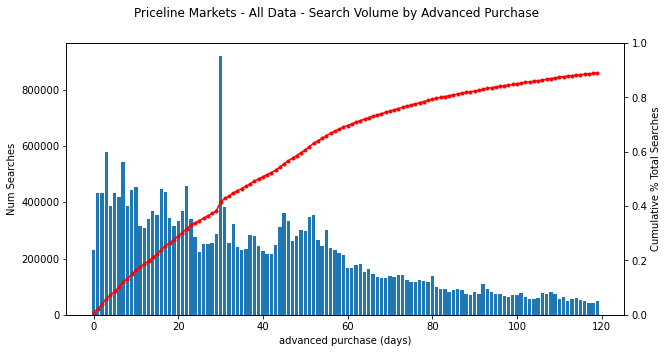

In [34]:
plot_bar_cum_pct(df_dtd_clip, 
                 top_n=120, 
                 bar_data_col='num_searches', 
                 line_data_col='cum_pct_searches', 
                 order_col='days_til_dept', 
                 x_label='advanced purchase (days)', 
                 what='Searches', 
                 plot_title='Priceline Markets - All Data - Search Volume by Advanced Purchase', 
                 file_name='plmad-dtd-srchs')


In [35]:
def print_time_stats(df, time_col, num, data_col='cum_pct_searches', individual_val_col='pct_searches'):
    x = df[df[time_col] == num]
    cum_pct = x[data_col].values[0]
    print(f"At {num} {time_col}:")
    print(f"Cumulative % search volume: {cum_pct*100:.0f}%")
    if individual_val_col is not None:
        pct = x[individual_val_col].values[0]
        print(f"% search volume: {pct*100:.1f}%")
    print()

In [36]:
for num in [14, 30, 60, 90, 120]:
    print_time_stats(df=df_dtd_clip,
                     time_col='days_til_dept',
                     num=num,
#                      individual_val_col=None
                    )

At 14 days_til_dept:
Cumulative % search volume: 21%
% search volume: 1.3%

At 30 days_til_dept:
Cumulative % search volume: 41%
% search volume: 3.2%

At 60 days_til_dept:
Cumulative % search volume: 70%
% search volume: 0.6%

At 90 days_til_dept:
Cumulative % search volume: 82%
% search volume: 0.3%

At 120 days_til_dept:
Cumulative % search volume: 89%
% search volume: 0.3%



### los

In [37]:
# modify me
data_path = os.path.join(pl_path, 'los-stats')

data_list = []
for file in os.listdir(data_path):
    if file != '_SUCCESS':
        try:
            df_temp = pd.read_csv(os.path.join(data_path, file), header=0)
            data_list.append(df_temp)
        except:
            print(f"Trouble parsing {file}")

if len(data_list) > 1:
    # change var name here
    df_los = pd.concat(data_list, axis=0)
else:
    # change var name here
    df_los = data_list[0].copy()

In [38]:
df_los.head()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
0,NaN,14062315,791048757,0.486367,0.109200,0.486367,0.109200
1,0.0,182686,19371017,0.006318,0.002674,0.492686,0.111874
2,1.0,298922,156745095,0.010339,0.021638,0.503024,0.133512
3,2.0,791317,424300626,0.027369,0.058572,0.530393,0.192085
4,3.0,1526369,727303972,0.052792,0.100401,0.583185,0.292485


In [39]:
df_rt_los = df_los.dropna()

In [40]:
# re-compute cum_pct_searches

df_rt_los.loc[:, 'pct_searches'] = df_rt_los['num_searches'] / df_rt_los['num_searches'].sum()
df_rt_los.loc[:, 'cum_pct_searches'] = df_rt_los['pct_searches'].cumsum()

/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_15170/247262479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_los.loc[:, 'pct_searches'] = df_rt_los['num_searches'] / df_rt_los['num_searches'].sum()
/var/folders/2c/ll166b4x7zlbnj4_twhr_69c0000gq/T/ipykernel_15170/247262479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt_los.loc[:, 'cum_pct_searches'] = df_rt_los['pct_searches'].cumsum()


In [41]:
df_rt_los.head()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
1,0.0,182686,19371017,0.012302,0.002674,0.012302,0.111874
2,1.0,298922,156745095,0.020129,0.021638,0.032430,0.133512
3,2.0,791317,424300626,0.053285,0.058572,0.085715,0.192085
4,3.0,1526369,727303972,0.102781,0.100401,0.188497,0.292485
5,4.0,1322708,666488445,0.089067,0.092005,0.277564,0.384490


In [42]:
df_rt_los.tail()

,stay_duration,num_searches,num_solutions,pct_searches,pct_solutions,cum_pct_searches,cum_pct_solutions
338,349.0,8,1459,5.386973e-07,2.014073e-07,1.0,1.0
339,353.0,1,628,6.733716e-08,8.669212e-08,1.0,1.0
340,354.0,1,395,6.733716e-08,5.452769e-08,1.0,1.0
341,357.0,1,12,6.733716e-08,1.656537e-09,1.0,1.0
342,358.0,1,26,6.733716e-08,3.589164e-09,1.0,1.0


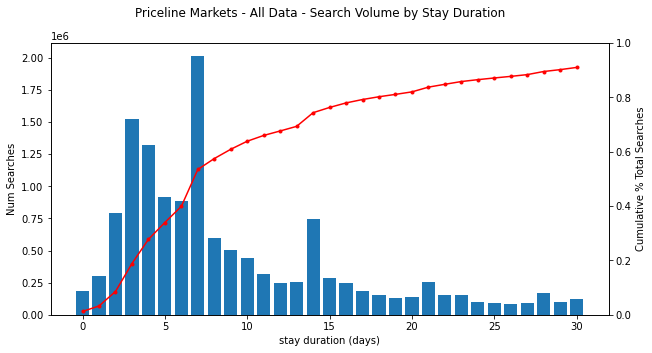

In [43]:
plot_bar_cum_pct(df_rt_los, 
                 top_n=31, 
                 bar_data_col='num_searches', 
                 line_data_col='cum_pct_searches', 
                 order_col='stay_duration', 
                 x_label='stay duration (days)', 
                 what='Searches', 
                 plot_title='Priceline Markets - All Data - Search Volume by Stay Duration', 
                 file_name='plmad-los-srchs')


In [44]:
for num in [3, 7, 14, 21, 30]:
    print_time_stats(df=df_rt_los,
                     time_col='stay_duration',
                     num=num,
#                      individual_val_col=''
                    )

At 3 stay_duration:
Cumulative % search volume: 19%
% search volume: 10.3%

At 7 stay_duration:
Cumulative % search volume: 53%
% search volume: 13.6%

At 14 stay_duration:
Cumulative % search volume: 74%
% search volume: 5.0%

At 21 stay_duration:
Cumulative % search volume: 84%
% search volume: 1.7%

At 30 stay_duration:
Cumulative % search volume: 91%
% search volume: 0.8%

